In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/8234846550_fdaf326dbe.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5139969631_743880e01d_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/18237156988_9ceb46a8de_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14460075029_5cd715bb72_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/21134000558_d7d6c9b1fe_n.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/3276552939_8c31b22d3e.jpg'),
 PosixPath('datasets/flower_photos/roses/2949945463_366bc63079_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/roses/3829990289_c0c3821e4d_m.jpg')]

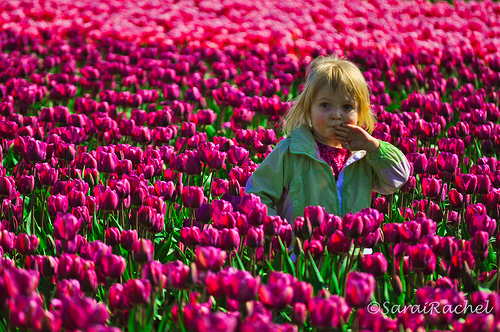

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/3276552939_8c31b22d3e.jpg'),
 PosixPath('datasets/flower_photos/roses/2949945463_366bc63079_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/roses/3829990289_c0c3821e4d_m.jpg')]

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img.shape

(332, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        # img 가 모두 크기가 다르기 때문에 같은 크기로 resize
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# scale images
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [21]:
# Build CNN -- take long long time
num_classes = 5

model = Sequential([
      # 16 filters, with size 3*3
      layers.Conv2D(16,3,padding='same',activation='relu'),
      layers.MaxPooling2D(),

      layers.Conv2D(32,3,padding='same',activation = 'relu'),
      layers.MaxPooling2D(),

      layers.Conv2D(64,3,padding='same',activation = 'relu'),
      layers.MaxPooling2D(),

      # Dense Array accept 1 d array
      # therefore, Flatten is needed
      layers.Flatten(),

      # 128 neurons in the middle
      layers.Dense(128,activation = 'relu'),
      layers.Dense(num_classes) # last layer --> total 5 neroun(num of outputs)
])

model.compile(optimizer = 'adam',
              # SparseCategoricalCrossentropy ?
              # not one hot encoded vector 이고, single value를 지니므로
              # 이런 cross entropy를 세팅해야 한다 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs = 10)

Epoch 1/10
86/86 [==============================] - 73s 840ms/step - loss: 1.2404 - accuracy: 0.4724
Epoch 2/10
86/86 [==============================] - 72s 839ms/step - loss: 0.9869 - accuracy: 0.6152
Epoch 3/10
86/86 [==============================] - 72s 839ms/step - loss: 0.7748 - accuracy: 0.7039
Epoch 4/10
86/86 [==============================] - 72s 838ms/step - loss: 0.5641 - accuracy: 0.7932
Epoch 5/10
86/86 [==============================] - 72s 838ms/step - loss: 0.3811 - accuracy: 0.8630
Epoch 6/10
86/86 [==============================] - 72s 839ms/step - loss: 0.1908 - accuracy: 0.9382
Epoch 7/10
86/86 [==============================] - 72s 842ms/step - loss: 0.1059 - accuracy: 0.9706
Epoch 8/10
86/86 [==============================] - 72s 842ms/step - loss: 0.0629 - accuracy: 0.9844
Epoch 9/10
86/86 [==============================] - 72s 843ms/step - loss: 0.0393 - accuracy: 0.9924
Epoch 10/10
86/86 [==============================] - 73s 845ms/step - loss: 0.0237 - accura

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 242ms/step - loss: 2.1649 - accuracy: 0.6383


[2.164862871170044, 0.6383442282676697]

In [36]:
# overfitting 
# high accuracy on train, low accuracy on test
predictions = model.predict(X_test_scaled)
predictions

array([[-8.011528  ,  4.439918  ,  6.62866   , -3.7568526 ,  2.0920155 ],
       [ 7.9221396 ,  7.7492585 ,  1.8036449 , -8.155234  , -0.6385273 ],
       [-3.9001906 , -0.8774711 ,  6.908367  ,  1.9481647 , -3.723997  ],
       ...,
       [ 1.9141757 , -4.795727  , -3.0361562 ,  2.1123722 ,  4.049195  ],
       [-2.4899564 ,  4.6184626 ,  2.2692685 , -1.2470709 , -3.5221682 ],
       [-4.48648   ,  0.03427704,  4.320385  ,  6.0721726 , -5.9567933 ]],
      dtype=float32)

In [37]:
# softmax : convert np.array into set of probabilities
score = tf.nn.softmax(predictions[0])

In [38]:
np.argmax(score) # give idx of elem that is max

2

In [27]:
y_test[0]

1

In [31]:
# data augmentation
data_augmentation = keras.Sequential([
    # 여기에 transformation을 명시한다. 
    # random zoom :zoom in or zoom out by 0.3 ratio
    layers.experimental.preprocessing.RandomZoom(0.3)
])

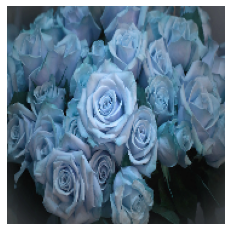

In [29]:
plt.axis('off')
plt.imshow(X[0])

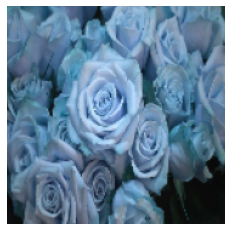

In [40]:
plt.axis('off')
# .numpy() : change into numpy array
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [44]:
# Improve test accuracy using data augmentation
# data augmentation

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

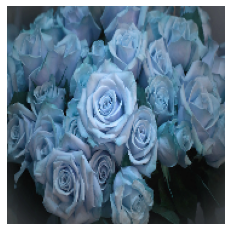

In [42]:
# original img 
plt.axis('off')
plt.imshow(X[0])

In [ ]:
# newly generated img
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [46]:
num_classes = 5

model = Sequential([
  # procide data_augmentation
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 87s 996ms/step - loss: 1.4099 - accuracy: 0.3903
Epoch 2/10
86/86 [==============================] - 86s 997ms/step - loss: 1.0916 - accuracy: 0.5654
Epoch 3/10
86/86 [==============================] - 86s 994ms/step - loss: 1.0234 - accuracy: 0.6097
Epoch 4/10
86/86 [==============================] - 85s 992ms/step - loss: 0.9552 - accuracy: 0.6294
Epoch 5/10
86/86 [==============================] - 85s 993ms/step - loss: 0.8849 - accuracy: 0.6606
Epoch 6/10
86/86 [==============================] - 85s 992ms/step - loss: 0.8125 - accuracy: 0.6966
Epoch 7/10
86/86 [==============================] - 86s 996ms/step - loss: 0.7845 - accuracy: 0.6937
Epoch 8/10
86/86 [==============================] - 86s 995ms/step - loss: 0.7324 - accuracy: 0.7220
Epoch 9/10
86/86 [==============================] - 86s 995ms/step - loss: 0.6964 - accuracy: 0.7442
Epoch 10/10
86/86 [==============================] - 85s 990ms/step - loss: 0.6659 - accura

In [47]:
model.evaluate(X_test_scaled,y_test) # accuracy increased 

29/29 [==============================] - 7s 242ms/step - loss: 0.8556 - accuracy: 0.6743


[0.8556309938430786, 0.6742919683456421]